<a href="https://colab.research.google.com/github/wellingtonvieira001/Comunidade_SST/blob/main/Analise_de_dados_de_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [66]:
import pandas as pd
import matplotlib as mtl
import numpy as np
import seaborn as sns



In [12]:
from google.colab import files
file_path = files.upload()

Saving online-retail-dataset.csv to online-retail-dataset (1).csv


In [42]:
df = pd.read_csv('/content/online-retail-dataset.csv')


In [27]:
df.shape

(541909, 8)

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [41]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [72]:
retail_data = df


In [73]:
# prompt: mude o formato da data da coluna  'InvoiceDate' para dia, mês e ano, horas , minutos

retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data['day'] = retail_data['InvoiceDate'].dt.day
retail_data['month'] = retail_data['InvoiceDate'].dt.month
retail_data['year'] = retail_data['InvoiceDate'].dt.year
retail_data['hour'] = retail_data['InvoiceDate'].dt.hour
retail_data['minute'] = retail_data['InvoiceDate'].dt.minute


In [74]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,26


In [75]:
retail_data = retail_data[retail_data['Quantity'] > 0]

In [76]:
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
retail_data = retail_data.dropna(subset=['CustomerID'])
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)

<ipython-input-76-509273f4585b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
<ipython-input-76-509273f4585b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)


In [77]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,hour,minute,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,12,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,1,12,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,8,26,20.34


In [78]:
retail_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
day            0
month          0
year           0
hour           0
minute         0
TotalPrice     0
dtype: int64

In [80]:
# RFM Calculation
reference_date = retail_data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm_data = retail_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'CompRecentes', 'InvoiceNo': 'FreqCompras', 'TotalPrice': 'TotalCompras'})

In [81]:
rfm_data.shape

(4339, 3)

In [83]:
rfm_data.head()

,CompRecentes,FreqCompras,TotalCompras
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


In [84]:
# Normalizing the RFM data for K-Means
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data[['CompRecentes', 'FreqCompras', 'TotalCompras']])

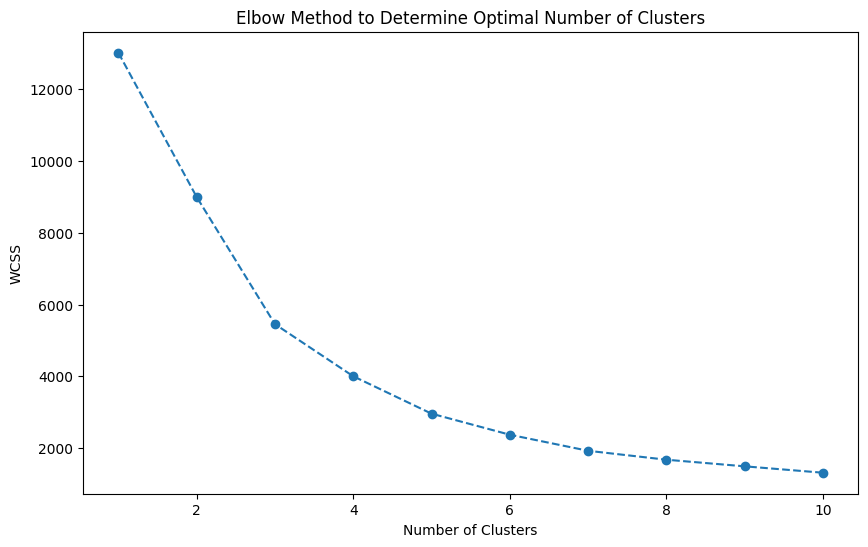

In [86]:
# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)
# Plotting the results to find the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(rfm_normalized)
rfm_data['Cluster'] = clusters
rfm_data

,CompRecentes,FreqCompras,TotalCompras,Cluster
CustomerID,,,,
12346,326,1,77183.60,0
12347,2,182,4310.00,1
12348,75,31,1797.24,1
12349,19,73,1757.55,1
12350,310,17,334.40,0
...,...,...,...,...
18280,278,10,180.60,0
18281,181,7,80.82,0
18282,8,12,178.05,1


In [92]:
# Analyzing the Clusters
cluster_analysis = rfm_data.groupby('Cluster').agg({
    'CompRecentes': 'mean',
    'FreqCompras': 'mean',
    'TotalCompras': 'mean'
}).sort_values(by='Cluster', ascending=True)
cluster_analysis['Count'] = rfm_data.groupby('Cluster').size()
cluster_analysis

,CompRecentes,FreqCompras,TotalCompras,Count
Cluster,,,,
0,247.308333,27.789815,637.318510,1080
1,41.344520,104.294951,2063.780669,3248
2,7.000000,847.142857,176606.164286,7
3,2.000000,5807.750000,70925.287500,4
